In [1]:
# Load Data
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import random
import csv
DataPath = './dataset/abcnews-date-text.csv'
class Data:
    Dates = []
    Titles = []
    size = 0
    pass

# load dates and titles from the csv file
def LoadData(path):
    with open(path, 'r') as f:
        data = Data()
        reader = csv.reader(f)
        for row in reader:
            if(reader.line_num > 1):
                data.Dates.append(row[0])
                data.Titles.append(row[1])
                data.size += 1
    return data

In [2]:
# Stop Words
STOPWORDS = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along",
             "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any",
             "anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because",
             "become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides",
             "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could",
             "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either",
             "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere",
             "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty",
             "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence",
             "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however",
             "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
             "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover",
             "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next",
             "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once",
             "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part",
             "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several",
             "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something",
             "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them",
             "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",
             "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together",
             "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via",
             "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby",
             "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose",
             "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

In [4]:
# Load Data
data = LoadData(DataPath)
print('Number of news headlines: ', len(data.Dates))
print(data.Dates[-1])
print(data.Titles[-1])

Number of news headlines:  2207330
20171231
who is george papadopoulos the former trump campaign aide


In [5]:
# Word Count
from collections import Counter
cnt = Counter()
num_of_words = Counter()
word_count = []
for title in data.Titles:
    words = title.split(" ")
    num = len(words)
    word_count.append(num)
    for word in words:
        cnt[word] += 1
len("Number of different words: ",cnt)

108168

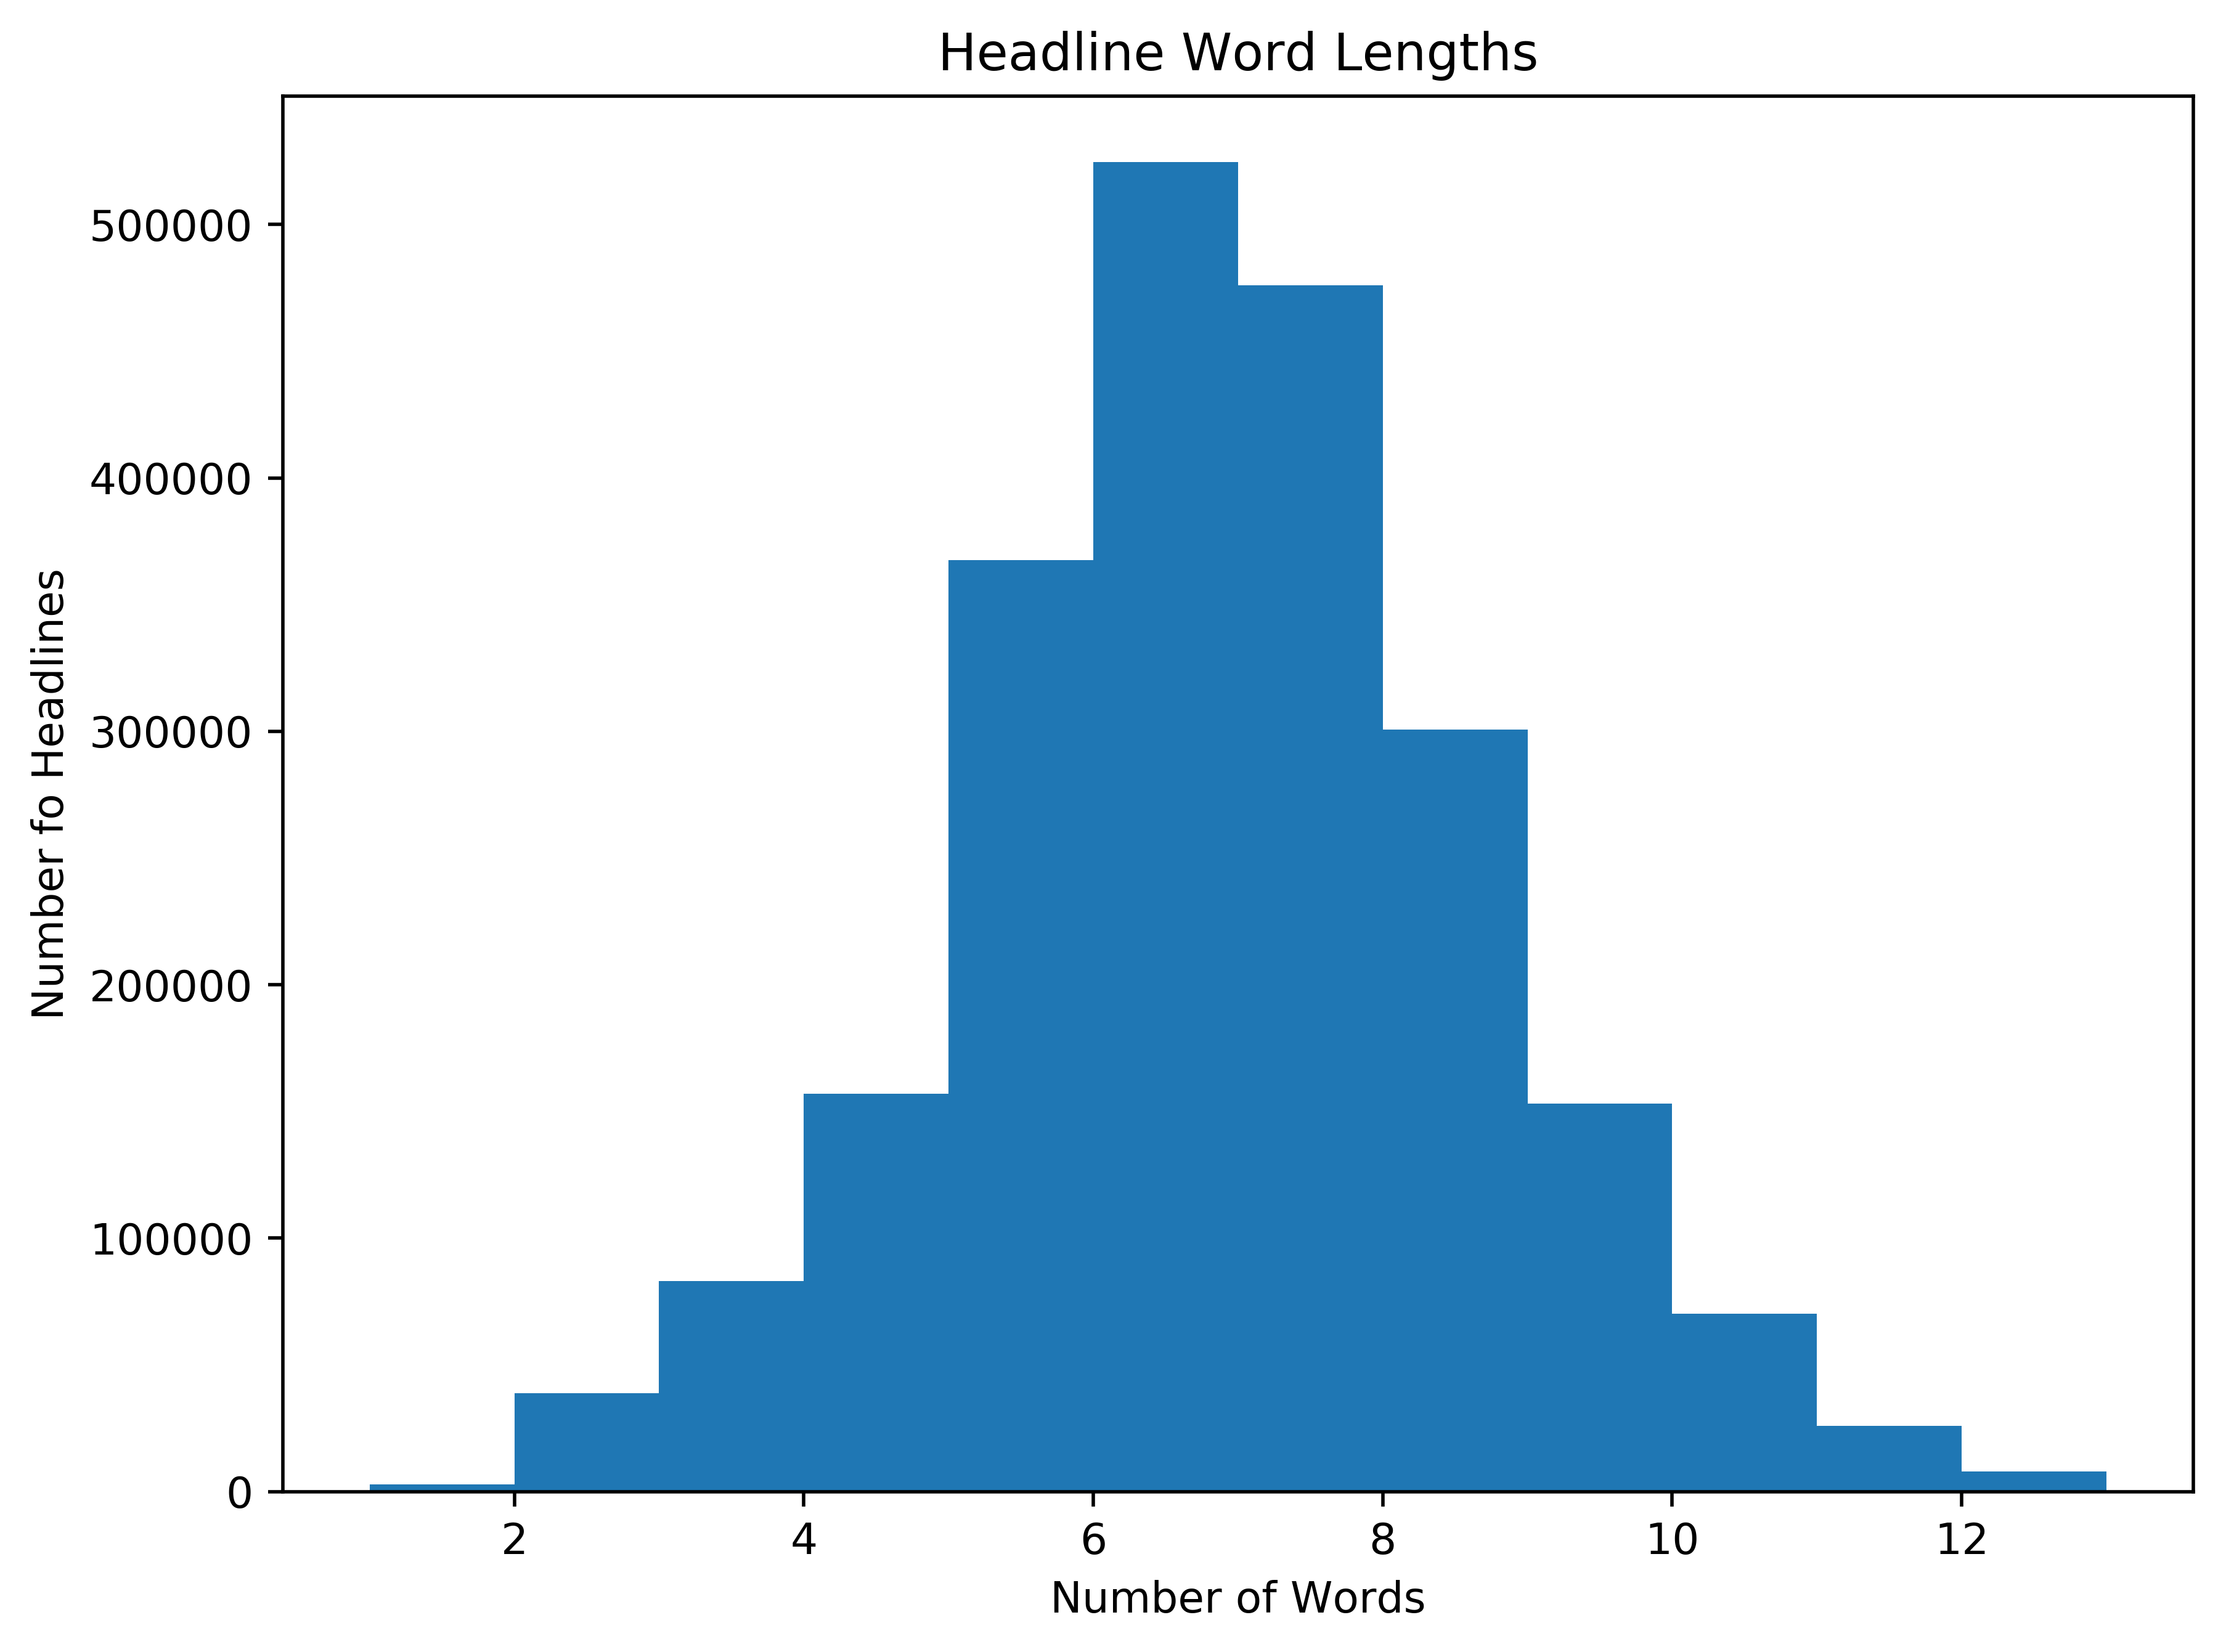

In [6]:
b = num_of_words.most_common(15)

fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.hist(word_count, bins=range(1,14))
# y = mlab.normpdf( np.linspace(0,14,50), np.mean(word_count), np.std(word_count))
# l = ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1)
ax.set_title('Headline Word Lengths')
ax.set_xlabel('Number of Words')
ax.set_ylabel('Number fo Headlines')
plt.show()

In [7]:
# Extract Features
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english', max_features=50000)

# 用1000个样本做测试
small_text_sample = random.sample(data.Titles, 1000)

print('Headline before vectorization: ', small_text_sample[2])

term_matrix = count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n', term_matrix[5])

print(small_text_sample[1:20])

Headline before vectorization:  goanna attacks 84yo man
Headline after vectorization: 
   (0, 1512)	1
  (0, 693)	1
  (0, 1356)	1
['court jails woman over real estate agent theft', 'goanna attacks 84yo man', 'dozens injured in asylum centre brawl', 'companies accused of trying to avoid worker safety', 'interview darren lehmann', 'working dogs get registration exemption', 'policeman charged with mulrunji manslaughter', 'brazilian player cleared of wrongdoing', 'project underway to control wild dogs along mid', 'e timor seeks extension of un peacekeeping mission', 'rmit hikes uni fees', 'vics force draw after love triple ton', 'death toll rises in dominican prison fire', 'storms ground planes at sydney airport', 'une proves popular with school leavers', 'american share prices fell despite better than', 'schoolies warned not to mix booze and surf', 'search continues for missing bushwalker', 'swan hill traders told to improve safety']


In [8]:
from sklearn.feature_extraction.text import TfidfTransformer


# 再基于Bags of words特征，变换为TF特征
tf_transformer = TfidfTransformer(use_idf=False).fit(term_matrix)
tf_matrix = tf_transformer.transform(term_matrix)
print(tf_matrix.shape)
# 查看数值特征
# tf_matrix.todense()#转换成数值特征Bags of words
print(tf_matrix[5])
# 查看特征名
#count_vectorizer.vocabulary_#特征名

(1000, 2945)
  (0, 1512)	0.5773502691896258
  (0, 693)	0.5773502691896258
  (0, 1356)	0.5773502691896258


In [9]:
# 再基于Bags of words特征，变换为TF-IDF特征
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(term_matrix)
print(tfidf_matrix.shape)
print(tfidf_matrix[5])
# tfidf_matrix.todense()

(1000, 2945)
  (0, 1356)	0.469066130788048
  (0, 693)	0.642275419023474
  (0, 1512)	0.6061841725628858


In [10]:
from sklearn.decomposition import TruncatedSVD

n_topics = 20

lsi_model = TruncatedSVD(n_components=n_topics)
lsi_matrix = lsi_model.fit_transform(tfidf_matrix)

In [11]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=n_topics, max_iter=300)
kmeans_topic_matrix = kmeans_model.fit_transform(tfidf_matrix)
# Cluster-distance space
kmeans_keys = [np.argmin(title) for title in kmeans_topic_matrix]

In [12]:
cnt2 = Counter()
word_count = []
for key in kmeans_keys:
    cnt2[key] += 1
cnt2

Counter({0: 176,
         1: 10,
         2: 525,
         3: 39,
         4: 26,
         5: 32,
         6: 26,
         7: 16,
         8: 7,
         9: 4,
         10: 22,
         11: 18,
         12: 4,
         13: 23,
         14: 8,
         15: 13,
         16: 15,
         17: 13,
         18: 11,
         19: 12})

In [13]:
from scipy.sparse import csr_matrix

def get_top_n_words(n, keys, term_matrix, count_vectorizer, n_topics):
    top_n_words_list = []
    top_n_words_index = []
    top_n_words_times = []
    for i in range(n_topics):
        index = [ii for ii in range(len(keys)) if keys[ii] == i]
        sum_vector = csr_matrix([np.int64(0)]*term_matrix[0].shape[1])
        for ii in index:
            sum_vector = sum_vector + term_matrix[ii]
        top_index = np.argsort(sum_vector.toarray())[0][-1:-(n+1):-1]
        top_times = np.sort(sum_vector.toarray())[0][-1:-(n+1):-1]
        top_n_words_index.append(top_index)
        top_n_words_times.append(top_times)
    for i in range(n_topics):
        top_list = []
        for j in range(len(top_n_words_index[i])):
            top_list.append(count_vectorizer.get_feature_names()[top_n_words_index[i][j]])
        top_n_words_list.append(top_list)
        
    return top_n_words_list, top_n_words_times
        
    

top_5_words_list, top_5_words_times = get_top_n_words(5, kmeans_keys, term_matrix, count_vectorizer, n_topics)


for i in range(n_topics):
    print("Topic %d" % i)
    for j in range(5):
        print(j+1, top_5_words_list[i][j], top_5_words_times[i][j])
    print()

Topic 0
1 australia 12
2 cup 8
3 court 7
4 trial 5
5 coal 5

Topic 1
1 film 4
2 future 3
3 festival 3
4 shut 2
5 stars 2

Topic 2
1 sydney 10
2 flood 8
3 death 8
4 nsw 7
5 plans 7

Topic 3
1 police 24
2 says 17
3 crash 2
4 hunt 2
5 william 2

Topic 4
1 plan 15
2 push 5
3 regional 4
4 tourism 4
5 nt 2

Topic 5
1 new 24
2 australian 9
3 open 3
4 social 2
5 indonesia 2

Topic 6
1 man 20
2 hit 7
3 hospital 4
4 police 3
5 jailed 3

Topic 7
1 report 9
2 fishing 4
3 pacific 3
4 illegal 3
5 taiwan 2

Topic 8
1 treatment 5
2 gives 2
3 hope 2
4 chief 1
5 20yrs 1

Topic 9
1 dam 4
2 opens 1
3 resolution 1
4 nimmitabel 1
5 stoush 1

Topic 10
1 qld 11
2 nt 10
3 join 3
4 police 3
5 rural 3

Topic 11
1 govt 13
2 review 5
3 urged 4
4 releases 2
5 backs 2

Topic 12
1 hits 4
2 tropical 1
3 police 1
4 jackpot 1
5 40 1

Topic 13
1 abc 10
2 market 10
3 business 6
4 news 5
5 australian 3

Topic 14
1 charges 5
2 cleared 4
3 violence 2
4 highly 1
5 player 1

Topic 15
1 interview 13
2 extended 2
3 injunction 1


In [ ]:
from sklearn.manifold import TSNE

tsne_kmeans_model = TSNE(n_components=3, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
#tsne_kmeans_vectors = tsne_kmeans_model.fit_transform(term_matrix.toarray())
tsne_kmeans_vectors = tsne_kmeans_model.fit_transform(tfidf_matrix.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.134s...
[t-SNE] Computed neighbors for 1000 samples in 6.557s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.310913
[t-SNE] KL divergence after 100 iterations with early exaggeration: 62.303410
[t-SNE] Error after 550 iterations: 2.007753


In [ ]:
from sklearn.manifold import TSNE

tsne_kmeans_model_2D = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_kmeans_vectors_2D = tsne_kmeans_model_2D.fit_transform(kmeans_topic_matrix)
#tsne_kmeans_vectors_2D = tsne_kmeans_model.fit_transform(tfidf_matrix.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.001660
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.421276


In [15]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap_text = np.array([
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]
colormap_textp = colormap_text[:n_topics]


def get_mean_topic_vectors(kmeans_keys, tsne_kmeans_vectors):
    num_of_topics = max(kmeans_keys)+1
    print(num_of_topics)
    kmeans_mean_topic_vectors = np.array([[0] * len(tsne_kmeans_vectors[0])] * num_of_topics)
    print(kmeans_mean_topic_vectors)
    counts = [0] * num_of_topics
    for i in range(len(tsne_kmeans_vectors)):
        counts[kmeans_keys[i]] += 1
        kmeans_mean_topic_vectors[kmeans_keys[i]] = kmeans_mean_topic_vectors[kmeans_keys[i]] + tsne_kmeans_vectors[i]
    for i in range(len(kmeans_mean_topic_vectors)):
        kmeans_mean_topic_vectors[i] = kmeans_mean_topic_vectors[i] / counts[i]
    return kmeans_mean_topic_vectors


kmeans_mean_topic_vectors = get_mean_topic_vectors(kmeans_keys, tsne_kmeans_vectors_2D)


plt.figure(figsize=(8, 8), dpi=300) 
ax = plt.subplot(111)
ax.scatter(tsne_kmeans_vectors_2D[1:2000,0], tsne_kmeans_vectors_2D[1:2000,1], c=colormap[kmeans_keys[1:2000]], alpha = 0.5) 
for i in range(n_topics):
    plt.text(kmeans_mean_topic_vectors[i][0], kmeans_mean_topic_vectors[i][1], 
             (top_5_words_list[i][0] + ' ' + top_5_words_list[i][1] +' ' + top_5_words_list[i][2]), color= "#000000")
plt.show()


NameError: name 'tsne_kmeans_vectors_2D' is not defined

In [17]:
#from bokeh.plotting import figure, output_file, show
#from bokeh.models import Label
#from bokeh.io import output_notebook
from mpl_toolkits.mplot3d import Axes3D


plt.figure(figsize=(8, 8), dpi=300) 
ax = plt.subplot(111, projection='3d')
ax.scatter(tsne_kmeans_vectors[:][0], tsne_kmeans_vectors[:][1], tsne_kmeans_vectors[:][2], c=colormap[kmeans_keys], alpha = 0.5) 
plt.show()

'''
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text_color=colormap[t])
    plot.add_layout(label)

show(plot)
'''

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1000,4) and requested shape (3,4)

'\nplot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)\nplot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])\n\nfor t in range(n_topics):\n    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], \n                  text_color=colormap[t])\n    plot.add_layout(label)\n\nshow(plot)\n'